# Geopandas
GeoPandas is a Python library that extends the pandas library by adding support for geospatial data
We will introduce the geopandas library to work with vector data

In [1]:
import geopandas as gpd

import matplotlib.pyplot as plt

In [4]:
gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


## Data

We will simplified point data about wild pigs (*Sus scrofa*) sightings in California
Data is from Global Biodiversity Information Facility (GBIF).

Read in the shapefile using the `geopandas` function `gpd.read_file()`:

In [3]:
#read in data
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `Geoseries` and `GeoDataFrame`

Core data structure in GeoPandas is the `geopandas.GeoDataFrame`

`geopandas.GeoDataFrame` = think of it as a `pandas.DataFrame` with a dedicated geometry column.

The **geometry column** in a `gpd.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. Columns in the `gpd.GeoDataFrame` with attributes about the features are `pandas.Series` (non-geometry column) like in a regular `pd.DataFrame`


In [5]:
#type of pigs dataframe
print(type(pigs))

#type of the geometry column
print(type(pigs.geometry))

#type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [6]:
#check the data type of the columns
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric information

Two other important attributes of a `gpd.GeoDataFrame` are its coordinate reference system (CRS) and its extent.

We can think of the coordinate reference system (CRS) as the instructions to locate each feature in our dataframe on the surface of the Earth

We access the CRS of a gpd.GeoDataFrame using the crs attribute:

In [7]:
#access CRS
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geo-dataframe is the bounding box covering all the features in our geo-dataframe.

We access the extent of a `gpd.GeoDataFrame` using the `total_bounds` attribute:

In [9]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data Wrangling

GeoPandas is conveniently built on top of `pandas`, so we may use everything we have learned about data selection, wrangling, and modification for a `pd.DataFrame`.

**Example**

We only want to use recent data for the wild pig observations.

In [11]:
#what years do we have?

pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use out usual data selection

In [13]:
#select data from 2020 onwards
pigs_recent = pigs[pigs.year>= 2020]

#print length of original dataframe
print(len(pigs))

# check length of new dataframe
len(pigs_recent)

1046


606

## Plotting

### `plot()`

Similarly to a `pd.DataFrame`, a `gpd.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. 

The geospatial information of the gpd.GeoDataFrame will be used to create the axes of the plot.

**Example**

This is a quick look at our recent pigs data:

<AxesSubplot:>

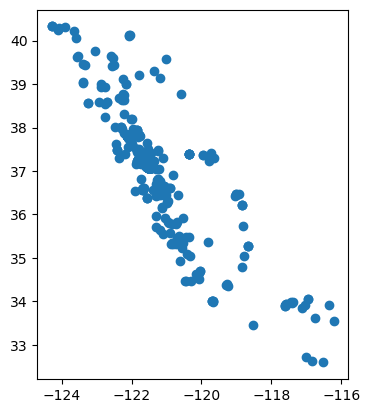

In [15]:
pigs_recent.plot()

### `matplotlib`'s `fig` and `ax`

We use `matplotlib` to create more complex, customized graphs. In particular, maps.

We can interact with `matplotlib` via its `pyplot` interface, which we imported as
```python
import matplotlib.pyplot as plt
```

Matplotlib graphs the data in a figure which can have one or more axes. The axis is only the area specified by the x-y axis and what is plotted in it. To create a new blank figure:

1. Initialize a new figure and axes by calling pyplot’s subplots() function, and
2. show the graph using plt.show():

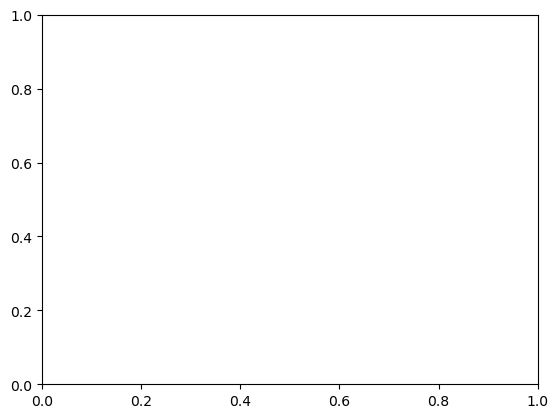

In [17]:
#create a blank figure (fig) with an empty axis (ax)
fig, ax = plt.subplots()

#display figure
plt.show()

## Adding a layer

When using `matplotlib`, it can be useful to think of creating a plot as adding layers to an axis

The general syntax to plot a datafram df onto an axis is:
```python
# create a new figure
fig, ax = plt.subplots()

#plot df on the ax axis
df.plot(ax=ax,
       ...) #other arguments for plot function

#display figure
plt.show()
```

**Example**

The first layer we want to add to our axis is the `pigs_recent` point data. We can plot our data using `matplotlib` like this:

<function matplotlib.pyplot.show(close=None, block=None)>

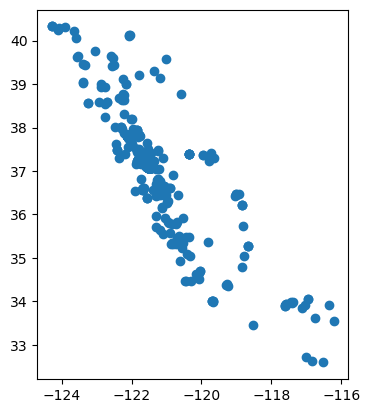

In [19]:
#create a new figure and axis
fig, ax = plt.subplots()

#add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

#display figure
plt.show

### Customization

Matplotlib allows for a lot of customization. 
Some of it can be done directly in the `plot()` method for the dataframe (like we’ve done when ploting data using pandas), while other is done by updating attributes of the axis ax. The following image shows some examples of elements in the axis that can be updated.

some basic customization of our pigs data:

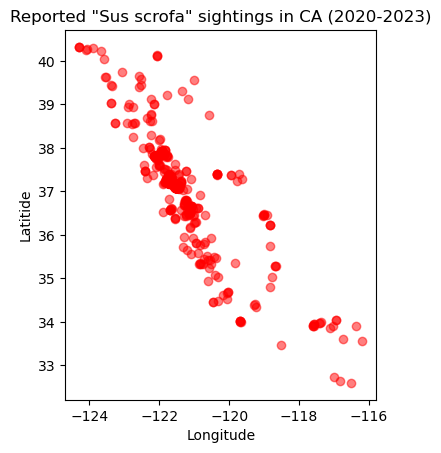

In [21]:
#initialize an empty figure
fig, ax = plt.subplots()

# add data to axis
#notice customization happens as arguments in plot()
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'red')

#update axis
#customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitide')

#display figure
plt.show()

## Exercise

1. Open the CA boundary shapefile and store as ca_boundary variable. How many features does it have?
2. Add it to the pig signtings graph so that the CA boundary appears behind the points.

In [24]:
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')
ca_boundary.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


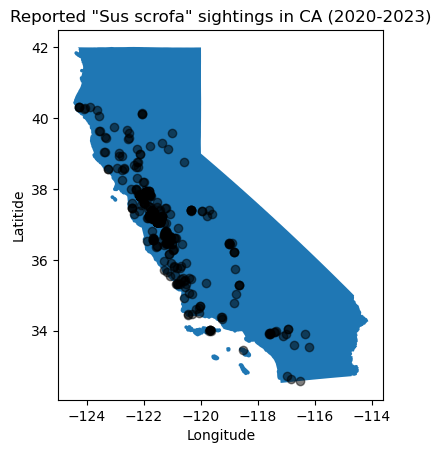

In [34]:
#initialize an empty figure
fig, ax = plt.subplots()

ca_boundary.plot(ax = ax)

# add data to axis
#notice customization happens as arguments in plot()
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'black')

#update axis
#customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitide')

#display figure
plt.show()